Math 5750/6880: Mathematics of Data Science \\
Project 1

# 3. Python and Google Colab
Project Euler Problem  
https://projecteuler.net/

In [1]:
# Problem 48, Self Powers
k = 0
series = []

for i in range(1,1001):
  i = i**i
  k += i
  series.append(k)

print(f"The last element of the series (list): {series[-1]}")
print(f"The last 10 digits of the last element in the series: {str(series[-1])[-10:]}")

The last element of the series (list): 1000368199144695177095375011227646795567793680622934654583760988100234910747716194381428659099527845945869942643191290894720342979906407679647259860434238468038326040809691037615370376237713648510063115732951461774246705584266865759601815843666442832284556880313114548151539190975398485496645576513465858582712336401166221956188173449531674102688908321764663020306699770408625340766091595022791379368098369306375602813856646358773751558775213460225796579846583334007349358624342339332981334571237888809283103348760261360175950815609179464026871005243652109980863552142014242903434068560936573231079342194031864413918101238151056509267393515760392842472501391594073463001521843811073767021711026307504695733467897821866906648469828346607412967395801797791683609834722432241952845352564681868240369569566192825555323558078061997527689983848863374786789331581565252059172614339424600986143259233167583371070362625554531852054166117148858229508581589614337594463277

# 4. Regression Analysis
California housing data  
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [33]:
# Load the California housing data
cal = fetch_california_housing(as_frame=True)
X, y = cal.data, cal.target
feature_names = X.columns
print(feature_names)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [5]:
print(X.shape)
print(y.shape)
print()
print(X.info())
print(X.describe())
print(X.head())
print()
print(y.describe())
print(y.head)
print()

(20640, 8)
(20640,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400  

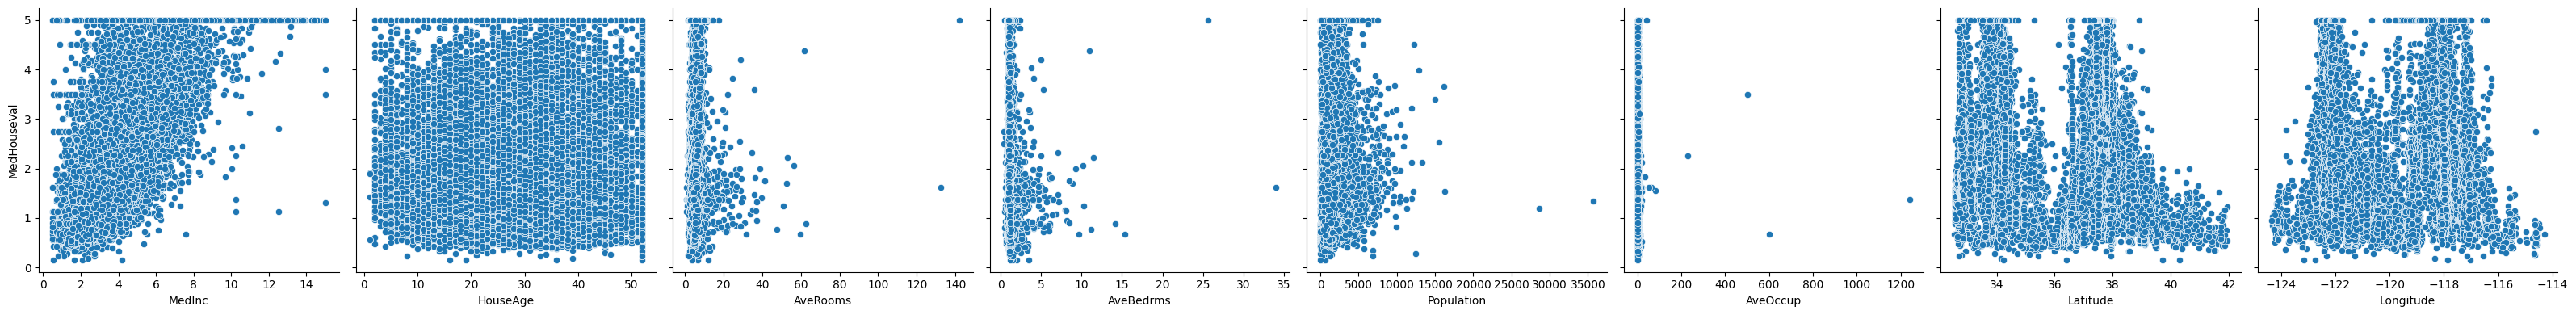

In [6]:
my_df = cal.frame
my_features = my_df.columns.drop('MedHouseVal').tolist()

sns.pairplot(my_df, x_vars=my_features, y_vars=['MedHouseVal'], height=4, aspect=1, kind='scatter')
plt.tight_layout()
plt.show()

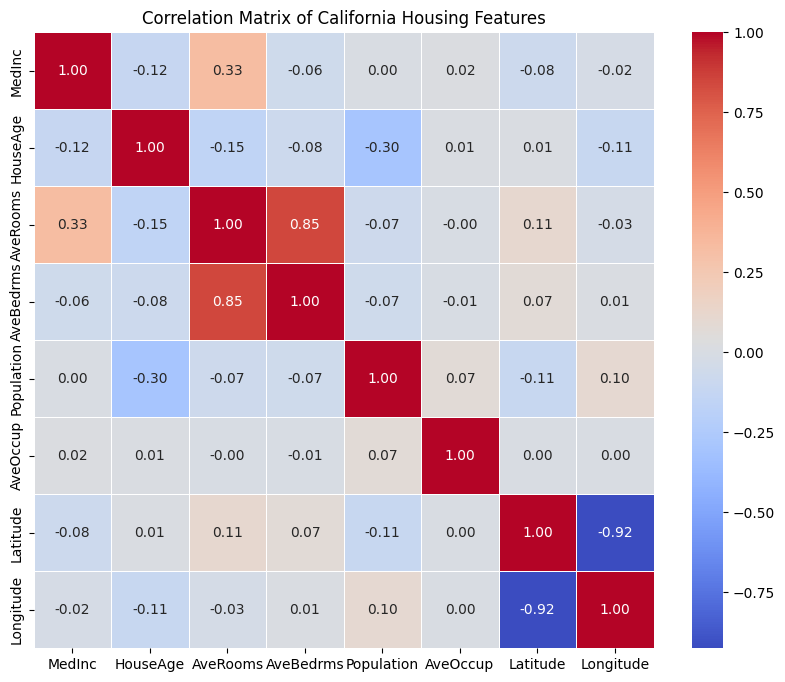

In [7]:
corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

=== TRAINING METRICS ===
Linear Regression R-Squared (Train): 0.6088968118672871
Linear Regression MAE (Train): 0.530874354486376
Linear Regression RMSE (Train): 0.7234924745376035

=== TEST METRICS ===
Linear Regression R-Squared (Test): 0.5943232652466202
Linear Regression MAE (Test): 0.535126133655451
Linear Regression RMSE (Test): 0.7273129773603114




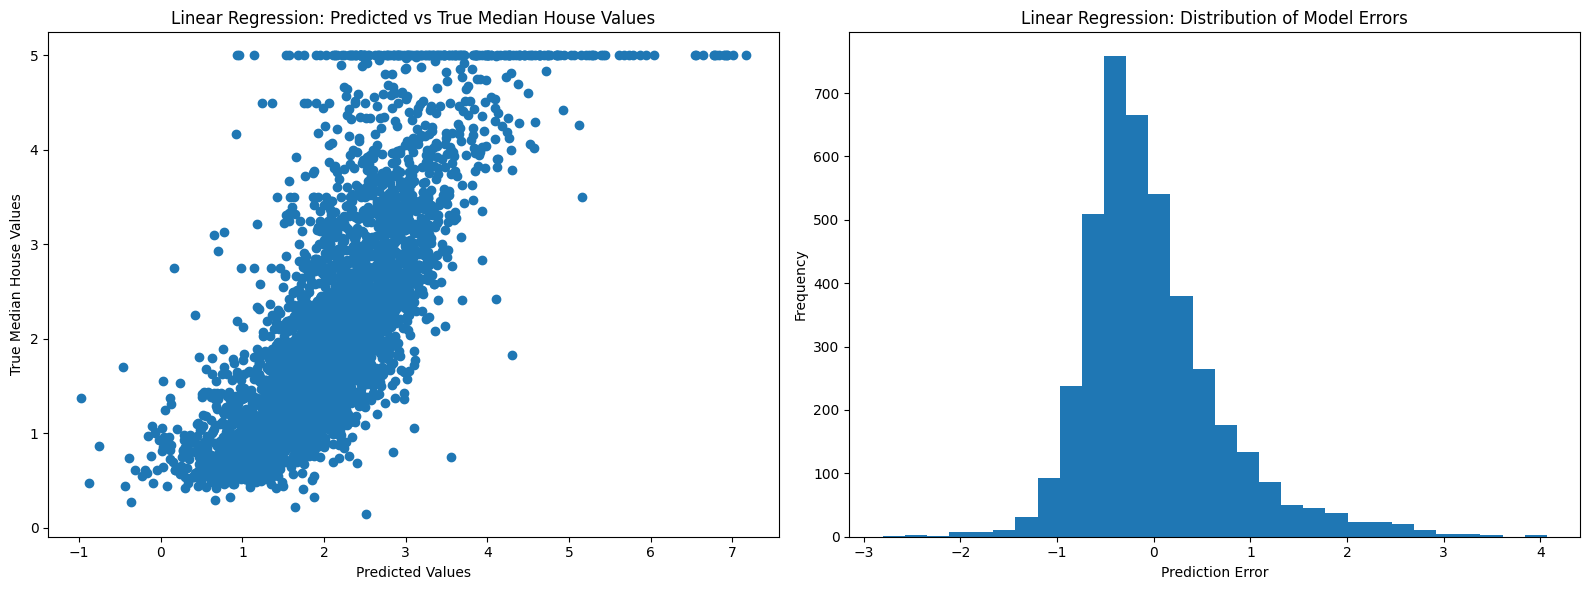

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print("=== TRAINING METRICS ===")
print("Linear Regression R-Squared (Train):", r2_score(y_train, y_train_pred))
print("Linear Regression MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("Linear Regression RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST METRICS ===")
print("Linear Regression R-Squared (Test):", r2_score(y_test, y_pred))
print("Linear Regression MAE (Test):", mean_absolute_error(y_test, y_pred))
print("Linear Regression RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Predicted vs True Values
ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Linear Regression: Predicted vs True Median House Values')

# Distribution of Model Errors
ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Linear Regression: Distribution of Model Errors')

plt.tight_layout()
plt.show()

Unreduced Model:
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3212.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        03:01:06   Log-Likelihood:                -18085.
No. Observations:               16512   AIC:                         3.619e+04
Df Residuals:                   16503   BIC:                         3.626e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.8586      0.737   

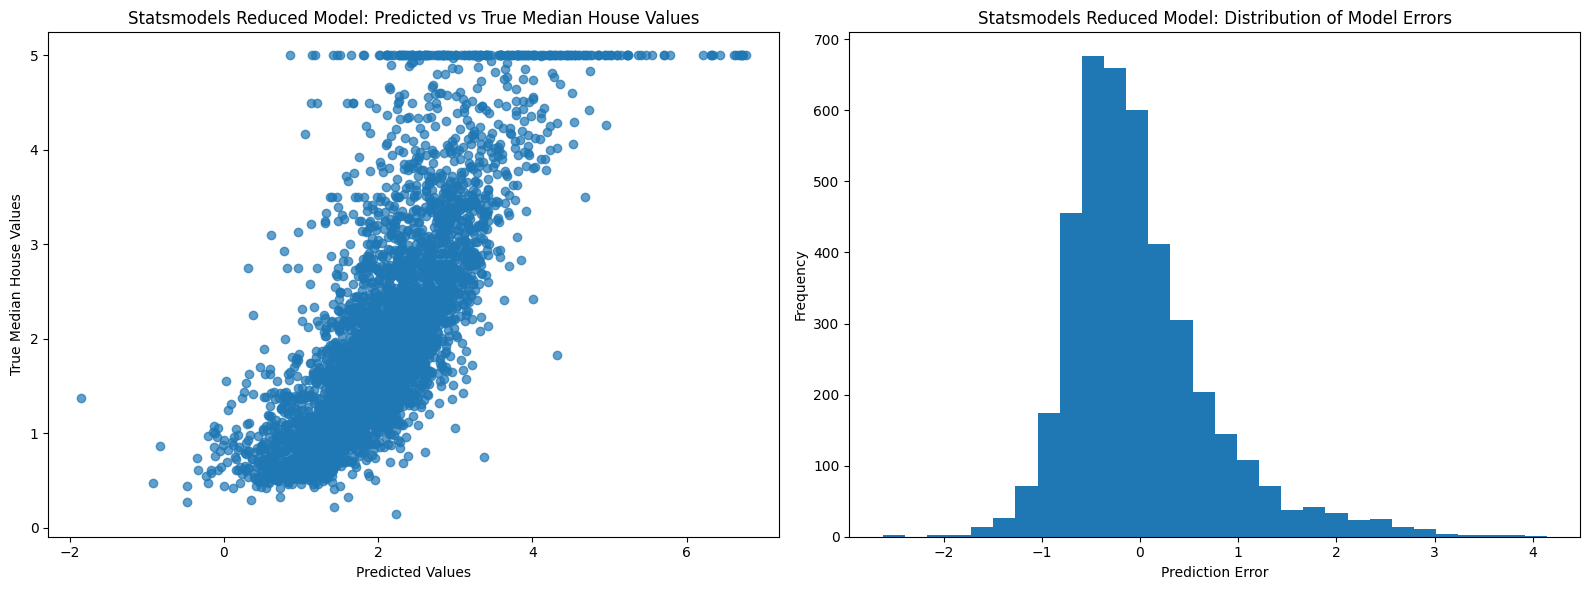

In [38]:
import statsmodels.api as sm

# Fit unreduced model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print("Unreduced Model:")
print(model_sm.summary())

# Prepare reduced model data
X_train_reduced = X_train.drop(['AveBedrms', 'Population'], axis=1)
X_test_reduced = X_test.drop(['AveBedrms', 'Population'], axis=1)

# Fit reduced model
X_train_sm_reduced = sm.add_constant(X_train_reduced)
model_sm_reduced = sm.OLS(y_train, X_train_sm_reduced).fit()

print()
print("Reduced Model:")
print(model_sm_reduced.summary())

# Generate predictions
X_test_sm_reduced = sm.add_constant(X_test_reduced)
y_pred_sm = model_sm_reduced.predict(X_test_sm_reduced)

print()
print("Statsmodels Reduced Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_sm))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sm)))

print()
print()

errors_sm = y_test - y_pred_sm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred_sm, y_test, alpha=0.7)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Statsmodels Reduced Model: Predicted vs True Median House Values')

ax2.hist(errors_sm, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Statsmodels Reduced Model: Distribution of Model Errors')

plt.tight_layout()
plt.show()

In [14]:
# Using LASSO for variable selection
scaler = StandardScaler()
scaler.fit(X_train)

sel_ = SelectFromModel(Lasso(alpha=0.01, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

# Check which features were selected/removed
selected_features = sel_.get_support()
feature_names = X_train.columns

print("REMOVED FEATURES:")
removed_features = []
for i, feature in enumerate(feature_names):
    if not selected_features[i]:
        print(f"{feature}")
        removed_features.append(feature)

print()
print(f"Total original features: {len(feature_names)}")
print(f"Features selected: {sum(selected_features)}")

X_train_sm = sm.add_constant(X_train_selected)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

REMOVED FEATURES:
Population

Total original features: 8
Features selected: 7
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     3670.
Date:                Mon, 08 Sep 2025   Prob (F-statistic):               0.00
Time:                        02:27:17   Log-Likelihood:                -18086.
No. Observations:               16512   AIC:                         3.619e+04
Df Residuals:                   16504   BIC:                         3.625e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

=== TRAINING METRICS ===
Decision Tree R-Squared (Train): 1.0
Decision Tree MAE (Train): 4.254779130225285e-17
Decision Tree RMSE (Train): 3.063949861237276e-16

=== TEST METRICS ===
Decision Tree R-Squared (Test): 0.5957989663673877
Decision Tree MAE (Test): 0.4654558502906977
Decision Tree RMSE (Test): 0.7259889250711369




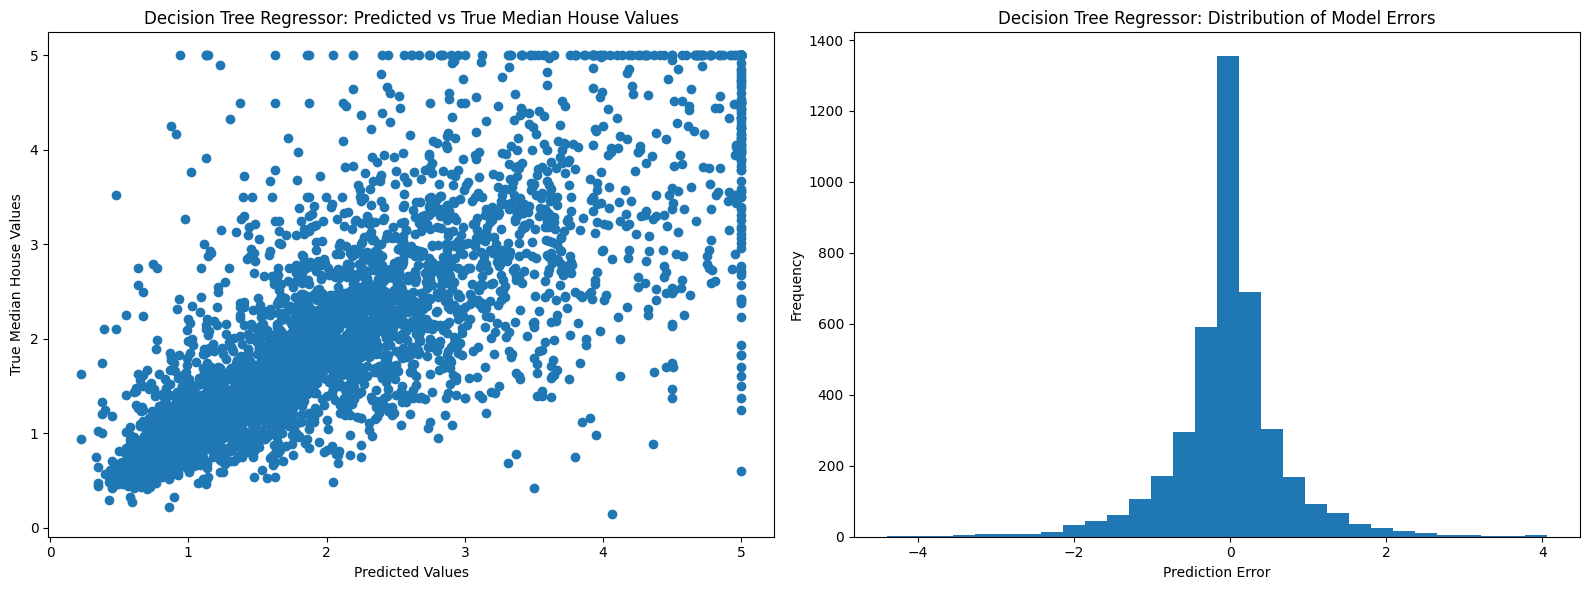

In [39]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("=== TRAINING METRICS ===")
print("Decision Tree R-Squared (Train):", r2_score(y_train, y_train_pred))
print("Decision Tree MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("Decision Tree RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST METRICS ===")
print("Decision Tree R-Squared (Test):", r2_score(y_test, y_pred))
print("Decision Tree MAE (Test):", mean_absolute_error(y_test, y_pred))
print("Decision Tree RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Decision Tree Regressor: Predicted vs True Median House Values')

ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Decision Tree Regressor: Distribution of Model Errors')

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Random Forest R-Squared (Train): 0.9731681411288503
Random Forest MAE (Train): 0.12293160084786862
Random Forest RMSE (Train): 0.18950196625869467

=== TEST METRICS ===
Random Forest R-Squared (Test): 0.7992724224662724
Random Forest MAE (Test): 0.334595692514535
Random Forest RMSE (Test): 0.511605031987444




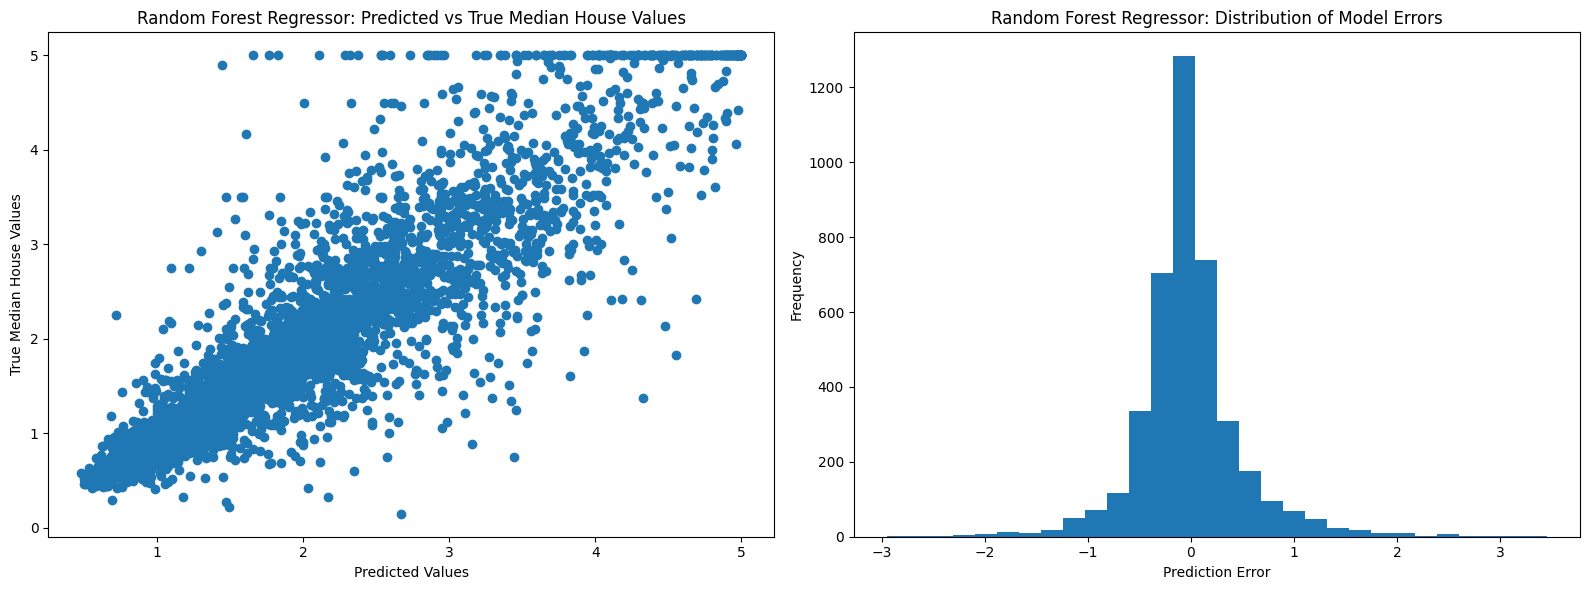

In [40]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("=== TRAINING METRICS ===")
print("Random Forest R-Squared (Train):", r2_score(y_train, y_train_pred))
print("Random Forest MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("Random Forest RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST METRICS ===")
print("Random Forest R-Squared (Test):", r2_score(y_test, y_pred))
print("Random Forest MAE (Test):", mean_absolute_error(y_test, y_pred))
print("Random Forest RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Random Forest Regressor: Predicted vs True Median House Values')

ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Random Forest Regressor: Distribution of Model Errors')

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Gradient Boosting R-Squared (Train): 0.8026974232879227
Gradient Boosting MAE (Train): 0.3593865823520727
Gradient Boosting RMSE (Train): 0.5138717209839442

=== TEST METRICS ===
Gradient Boosting R-Squared (Test): 0.7772694054349538
Gradient Boosting MAE (Test): 0.37416402618968747
Gradient Boosting RMSE (Test): 0.5389161814963223




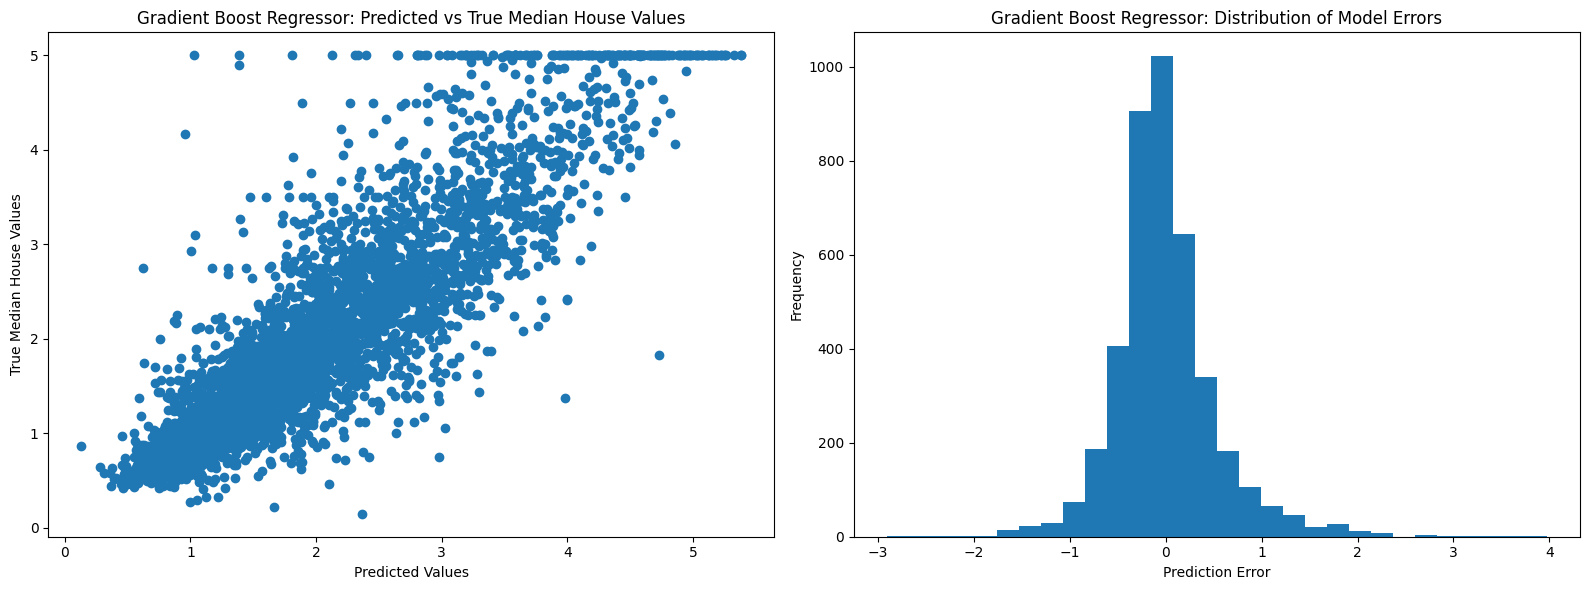

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("=== TRAINING METRICS ===")
print("Gradient Boosting R-Squared (Train):", r2_score(y_train, y_train_pred))
print("Gradient Boosting MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("Gradient Boosting RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST METRICS ===")
print("Gradient Boosting R-Squared (Test):", r2_score(y_test, y_pred))
print("Gradient Boosting MAE (Test):", mean_absolute_error(y_test, y_pred))
print("Gradient Boosting RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Gradient Boost Regressor: Predicted vs True Median House Values')

ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Gradient Boost Regressor: Distribution of Model Errors')

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Bayesian Ridge R-Squared (Train): 0.6088960863311303
Bayesian Ridge MAE (Train): 0.5309176586669526
Bayesian Ridge RMSE (Train): 0.7234931456133218

=== TEST METRICS ===
Bayesian Ridge R-Squared (Test): 0.5942506084924775
Bayesian Ridge MAE (Test): 0.5351853504668542
Bayesian Ridge RMSE (Test): 0.7273781053671272




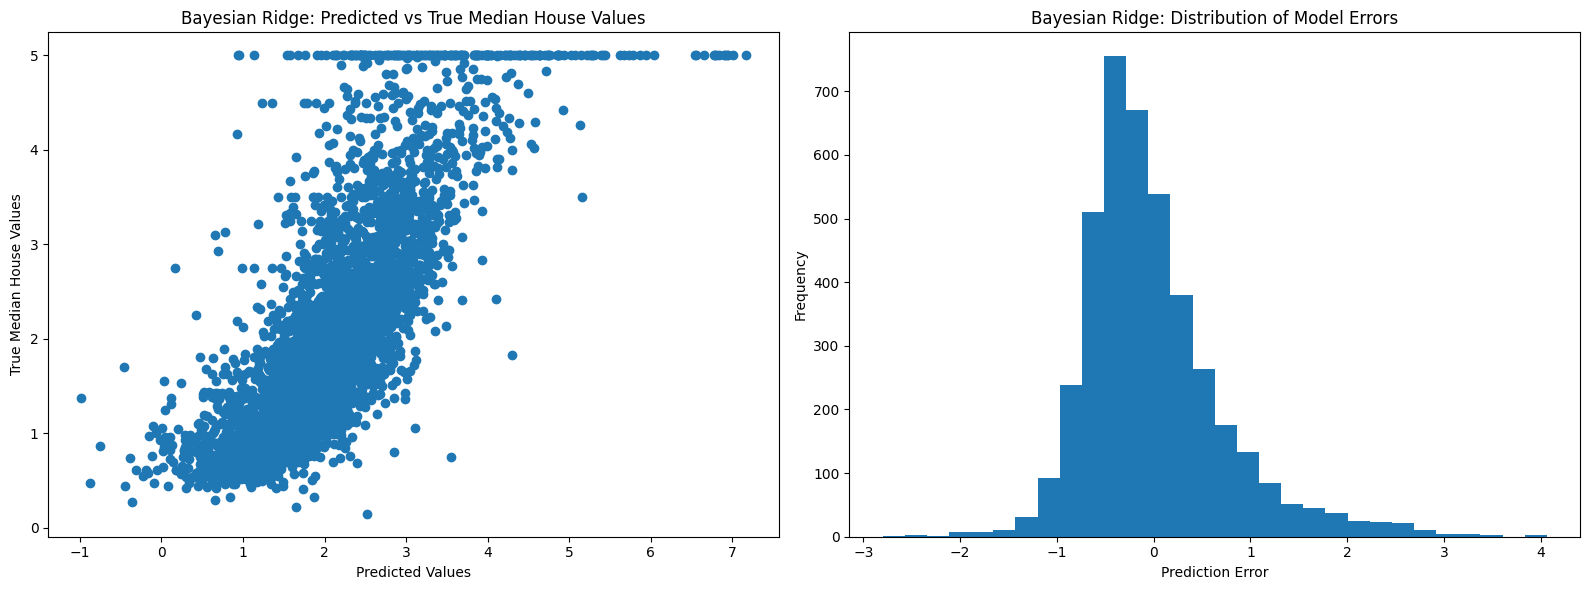

In [42]:
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

print("=== TRAINING METRICS ===")
print("Bayesian Ridge R-Squared (Train):", r2_score(y_train, y_train_pred))
print("Bayesian Ridge MAE (Train):", mean_absolute_error(y_train, y_train_pred))
print("Bayesian Ridge RMSE (Train):", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\n=== TEST METRICS ===")
print("Bayesian Ridge R-Squared (Test):", r2_score(y_test, y_pred))
print("Bayesian Ridge MAE (Test):", mean_absolute_error(y_test, y_pred))
print("Bayesian Ridge RMSE (Test):", np.sqrt(mean_squared_error(y_test, y_pred)))

print()
print()

errors = y_test - y_pred

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(y_pred, y_test)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('True Median House Values')
ax1.set_title('Bayesian Ridge: Predicted vs True Median House Values')

ax2.hist(errors, bins=30)
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('Bayesian Ridge: Distribution of Model Errors')

plt.tight_layout()
plt.show()

# 5. Classification Analysis
Diagnostic Wisconsin Breast Cancer Database  
https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc)
from sklearn.preprocessing import StandardScaler

In [44]:
# Load Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target                  # 0 = malignant, 1 = benign
feature_names = X.columns
label_names = {0: "malignant", 1: "benign"}
print(feature_names)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Preprocess Data (fit on train ONLY; then transform both)
scaler = StandardScaler(with_mean=True, with_std=True)
X_train_std = scaler.fit_transform(X_train)   # fit on train
X_test_std  = scaler.transform(X_test)        # transform test with train stats

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [45]:
print(X.shape)
print(y.shape)
print()
print(X.info())
print(X.describe())
print()
print(y.describe())
print()

(569, 30)
(569,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothne

In [46]:
# Support Vector Machine
from sklearn.svm import SVC

svm = SVC(random_state=0)
svm.fit(X_train_std, y_train)

y_train_pred_svm = svm.predict(X_train_std)
y_test_pred_svm = svm.predict(X_test_std)

print("=== TRAINING METRICS ===")
print("SVM Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_svm))
print()
print("SVM Accuracy (Train):", accuracy_score(y_train, y_train_pred_svm))
print("SVM ROC AUC (Train):", roc_auc_score(y_train, y_train_pred_svm))
print("SVM Average Precision (Train):", average_precision_score(y_train, y_train_pred_svm))

print("\n=== TEST METRICS ===")
print("SVM Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_test_pred_svm))
print()
print("SVM Accuracy (Test):", accuracy_score(y_test, y_test_pred_svm))
print("SVM ROC AUC (Test):", roc_auc_score(y_test, y_test_pred_svm))
print("SVM Average Precision (Test):", average_precision_score(y_test, y_test_pred_svm))

=== TRAINING METRICS ===
SVM Confusion Matrix (Train):
[[166   4]
 [  1 284]]

SVM Accuracy (Train): 0.989010989010989
SVM ROC AUC (Train): 0.9864809081527347
SVM Average Precision (Train): 0.9848488743225585

=== TEST METRICS ===
SVM Confusion Matrix (Test):
[[40  2]
 [ 2 70]]

SVM Accuracy (Test): 0.9649122807017544
SVM ROC AUC (Test): 0.9623015873015873
SVM Average Precision (Test): 0.9627599090318388


SVM CLASSIFICATION RESULTS
=== TRAINING METRICS ===
Confusion Matrix (Train):
[[166   4]
 [  1 284]]

Accuracy (Train): 0.9890
ROC AUC (Train): 0.9983
Average Precision (Train): 0.9988

=== TEST METRICS ===
Confusion Matrix:
[[40  2]
 [ 2 70]]

Accuracy: 0.9649
ROC AUC: 0.9934
Average Precision: 0.9960




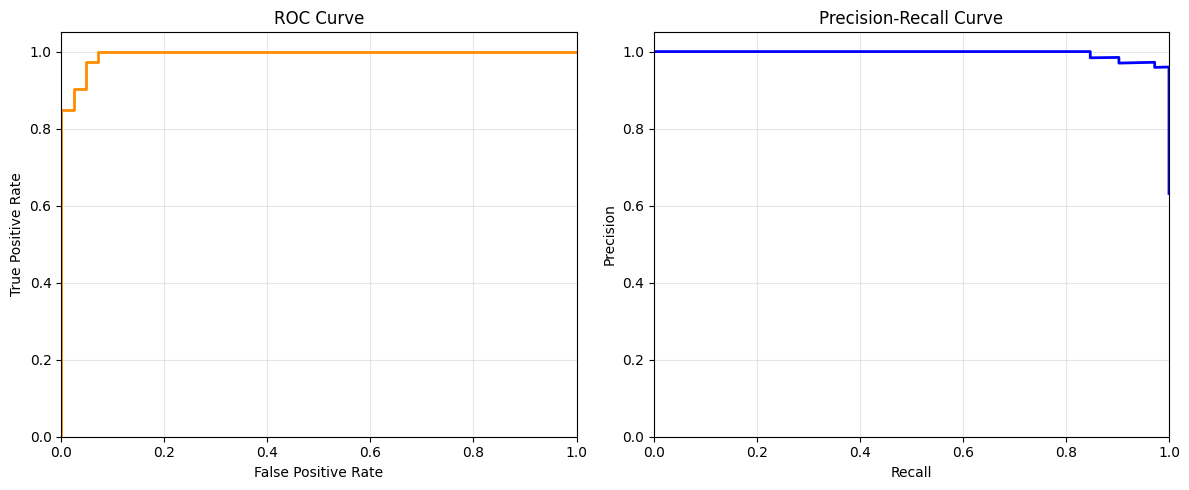

In [47]:
svm = SVC(random_state=0, probability=True)
svm.fit(X_train_std, y_train)

y_train_pred_svm = svm.predict(X_train_std)
y_train_pred_proba = svm.predict_proba(X_train_std)[:, 1]
y_pred_svm = svm.predict(X_test_std)
y_pred_proba = svm.predict_proba(X_test_std)[:, 1]

print("SVM CLASSIFICATION RESULTS")
print("=" * 40)

print("=== TRAINING METRICS ===")
print("Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_svm))
print()
print(f"Accuracy (Train): {accuracy_score(y_train, y_train_pred_svm):.4f}")
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba):.4f}")

print()
print("=== TEST METRICS ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_pred_proba):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Logistic Regression Confusion Matrix (Train):
[[167   3]
 [  2 283]]

Logistic Regression Accuracy (Train): 0.989010989010989

Accuracy (Train): 0.9890
ROC AUC (Train): 0.9979
Average Precision (Train): 0.9986

=== TEST METRICS ===
Logistic Regression Confusion Matrix:
[[40  2]
 [ 0 72]]

Logistic Regression Accuracy: 0.9824561403508771

Accuracy: 0.9825
ROC AUC: 0.9957
Average Precision: 0.9974




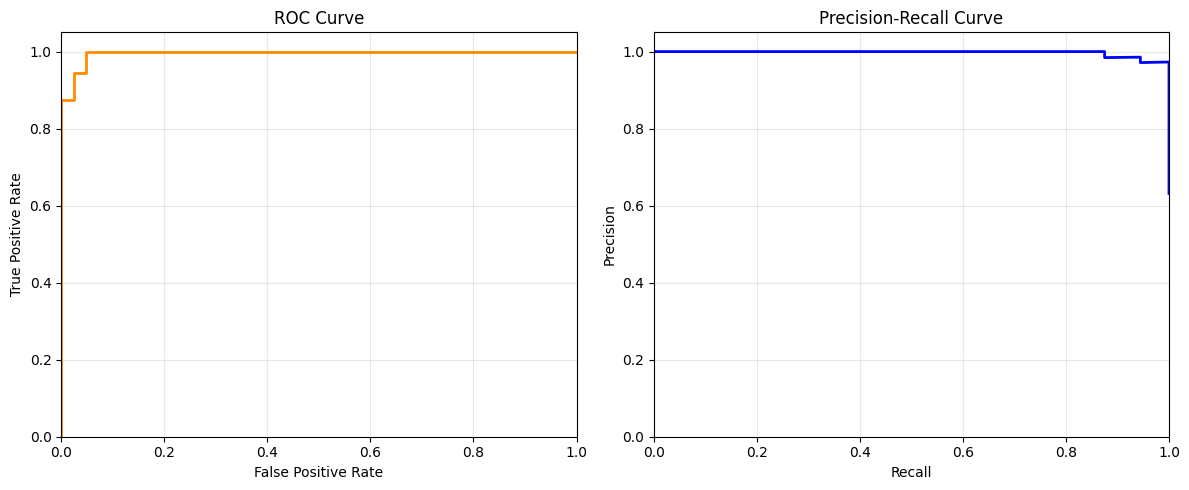

In [48]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

log_reg = LogisticRegression(random_state=0, max_iter=1000)
log_reg.fit(X_train_std, y_train)

# Get predictions for both training and test sets
y_train_pred_log = log_reg.predict(X_train_std)
y_train_pred_proba = log_reg.predict_proba(X_train_std)[:, 1]  # Get probabilities for positive class
y_pred_log = log_reg.predict(X_test_std)
y_pred_proba = log_reg.predict_proba(X_test_std)[:, 1]  # Get probabilities for positive class

print("=== TRAINING METRICS ===")
print("Logistic Regression Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_log))
print()
print("Logistic Regression Accuracy (Train):", accuracy_score(y_train, y_train_pred_log))
print()
print(f"Accuracy (Train): {accuracy_score(y_train, y_train_pred_log):.4f}")
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba):.4f}")

print()
print("=== TEST METRICS ===")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))
print()
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")  # Fixed variable name
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Average Precision: {average_precision_score(y_test, y_pred_proba):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Random Forest Confusion Matrix (Train):
[[170   0]
 [  0 285]]

Random Forest Accuracy (Train): 1.0
ROC AUC (Train): 1.0000
Average Precision (Train): 1.0000

=== TEST METRICS ===
Random Forest Confusion Matrix:
[[40  2]
 [ 4 68]]

Random Forest Accuracy: 0.9473684210526315
ROC AUC (Test): 0.9729
Average Precision (Test): 0.9704




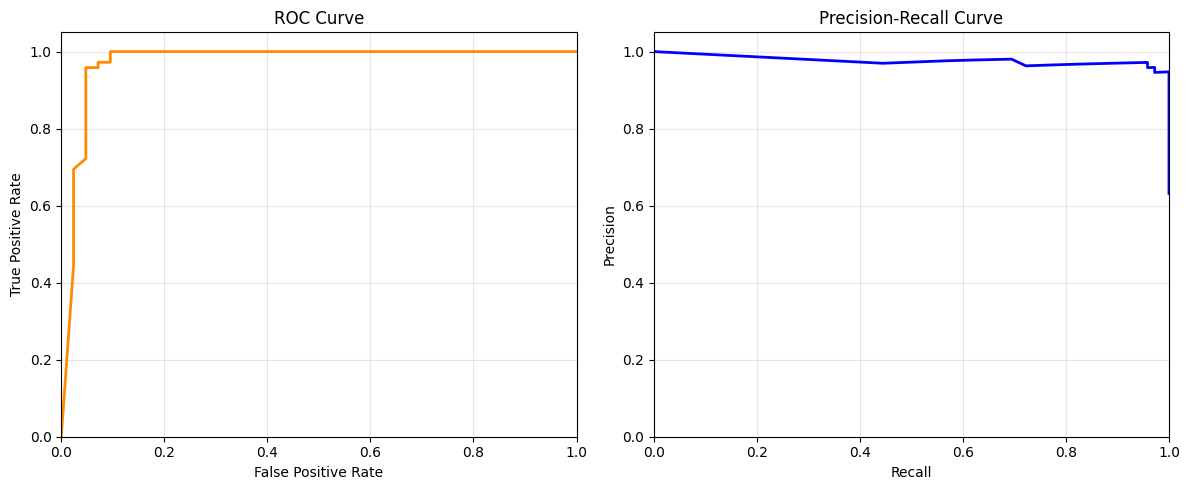

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(X_train, y_train)  # Tree models don't need standardization

y_train_pred_rf = rf.predict(X_train)
y_train_pred_proba_rf = rf.predict_proba(X_train)[:, 1]
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== TRAINING METRICS ===")
print("Random Forest Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_rf))
print()
print("Random Forest Accuracy (Train):", accuracy_score(y_train, y_train_pred_rf))
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba_rf):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba_rf):.4f}")

print()
print("=== TEST METRICS ===")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print()
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(f"ROC AUC (Test): {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print(f"Average Precision (Test): {average_precision_score(y_test, y_pred_proba_rf):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_rf)
avg_precision = average_precision_score(y_test, y_pred_proba_rf)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Naive Bayes Confusion Matrix (Train):
[[153  17]
 [ 12 273]]

Naive Bayes Accuracy (Train): 0.9362637362637363
ROC AUC (Train): 0.9900
Average Precision (Train): 0.9942

=== TEST METRICS ===
Naive Bayes Confusion Matrix:
[[38  4]
 [ 7 65]]

Naive Bayes Accuracy: 0.9035087719298246
ROC AUC (Test): 0.9673
Average Precision (Test): 0.9790




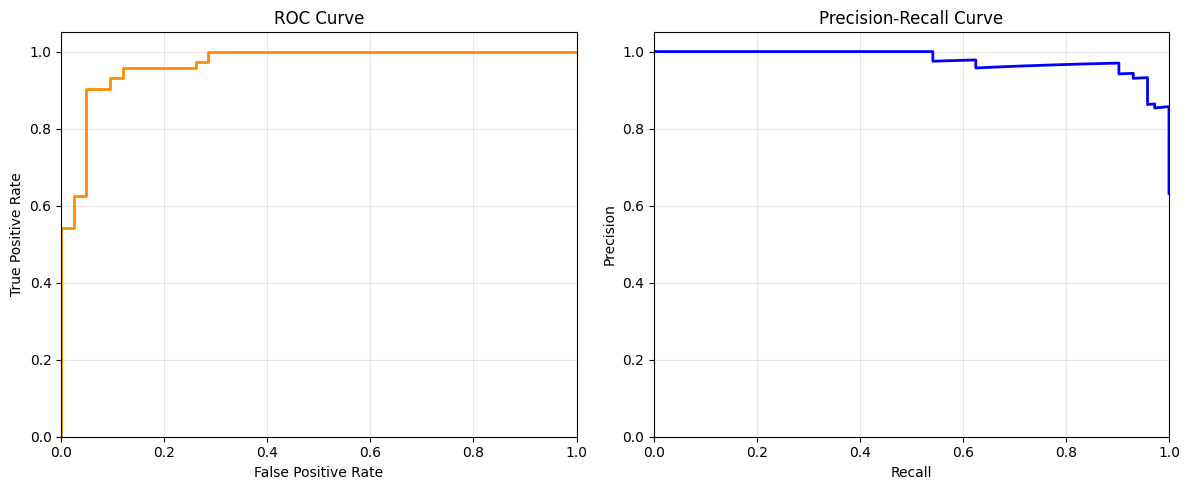

In [51]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_std, y_train)

y_train_pred_nb = nb.predict(X_train_std)
y_train_pred_proba_nb = nb.predict_proba(X_train_std)[:, 1]
y_pred_nb = nb.predict(X_test_std)
y_pred_proba_nb = nb.predict_proba(X_test_std)[:, 1]

print("=== TRAINING METRICS ===")
print("Naive Bayes Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_nb))
print()
print("Naive Bayes Accuracy (Train):", accuracy_score(y_train, y_train_pred_nb))
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba_nb):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba_nb):.4f}")

print()
print("=== TEST METRICS ===")
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print()
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(f"ROC AUC (Test): {roc_auc_score(y_test, y_pred_proba_nb):.4f}")
print(f"Average Precision (Test): {average_precision_score(y_test, y_pred_proba_nb):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc = roc_auc_score(y_test, y_pred_proba_nb)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_nb)
avg_precision = average_precision_score(y_test, y_pred_proba_nb)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
KNN Confusion Matrix (Train):
[[164   6]
 [  2 283]]

KNN Accuracy (Train): 0.9824175824175824
ROC AUC (Train): 0.9988
Average Precision (Train): 0.9988

=== TEST METRICS ===
KNN Confusion Matrix:
[[38  4]
 [ 1 71]]

KNN Accuracy: 0.956140350877193
ROC AUC (Test): 0.9706
Average Precision (Test): 0.9671




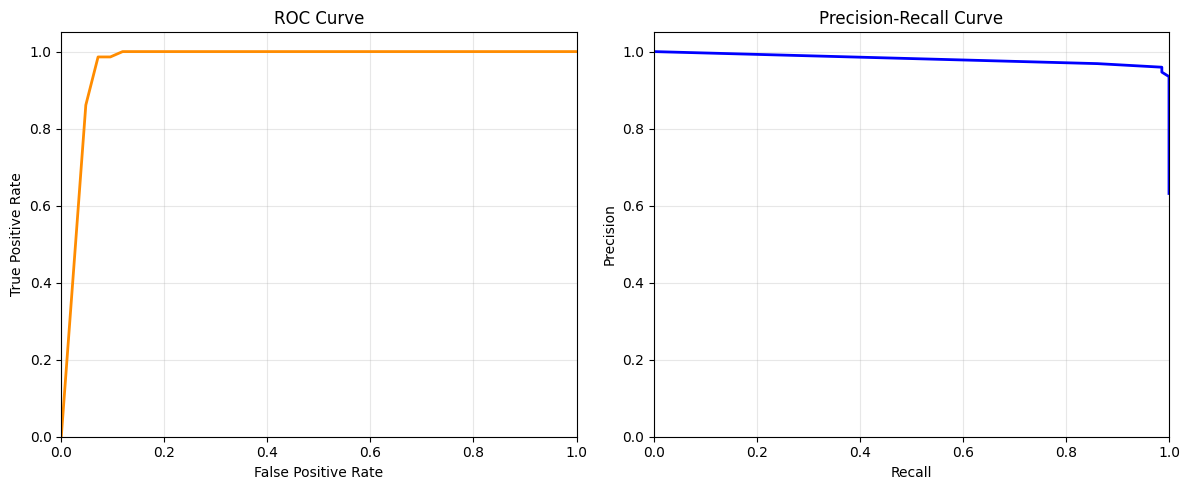

In [52]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

y_train_pred_knn = knn.predict(X_train_std)
y_train_pred_proba_knn = knn.predict_proba(X_train_std)[:, 1]
y_pred_knn = knn.predict(X_test_std)
y_pred_proba_knn = knn.predict_proba(X_test_std)[:, 1]

print("=== TRAINING METRICS ===")
print("KNN Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_knn))
print()
print("KNN Accuracy (Train):", accuracy_score(y_train, y_train_pred_knn))
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba_knn):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba_knn):.4f}")

print()
print("=== TEST METRICS ===")
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print()
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(f"ROC AUC (Test): {roc_auc_score(y_test, y_pred_proba_knn):.4f}")
print(f"Average Precision (Test): {average_precision_score(y_test, y_pred_proba_knn):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_knn)
avg_precision = average_precision_score(y_test, y_pred_proba_knn)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== TRAINING METRICS ===
Decision Tree Confusion Matrix (Train):
[[170   0]
 [  0 285]]

Decision Tree Accuracy (Train): 1.0
ROC AUC (Train): 1.0000
Average Precision (Train): 1.0000

=== TEST METRICS ===
Decision Tree Confusion Matrix:
[[40  2]
 [ 5 67]]

Decision Tree Accuracy: 0.9385964912280702
ROC AUC (Test): 0.9415
Average Precision (Test): 0.9474




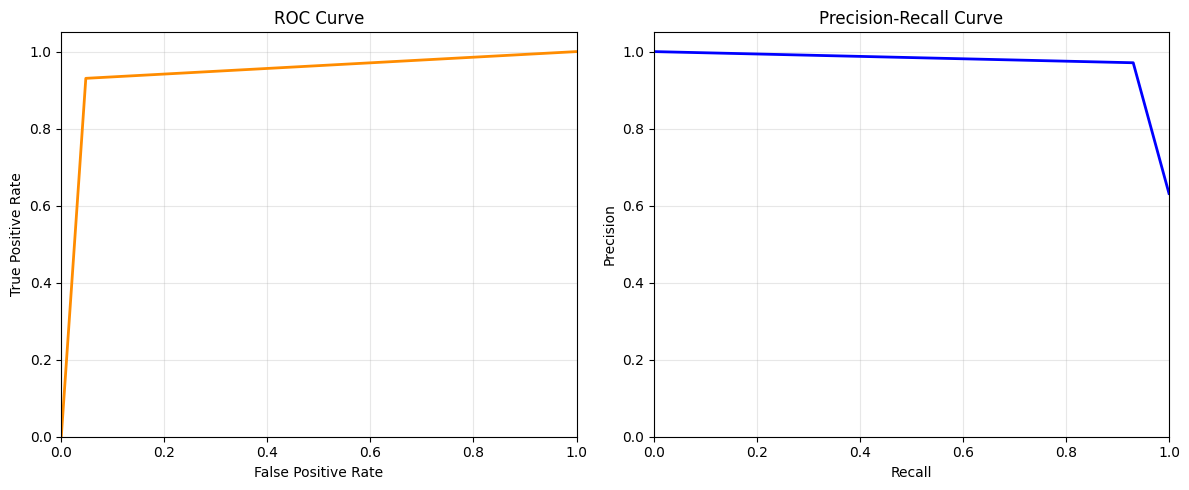

In [53]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)  # Tree models don't need standardization

y_train_pred_dt = dt.predict(X_train)
y_train_pred_proba_dt = dt.predict_proba(X_train)[:, 1]
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]

print("=== TRAINING METRICS ===")
print("Decision Tree Confusion Matrix (Train):")
print(confusion_matrix(y_train, y_train_pred_dt))
print()
print("Decision Tree Accuracy (Train):", accuracy_score(y_train, y_train_pred_dt))
print(f"ROC AUC (Train): {roc_auc_score(y_train, y_train_pred_proba_dt):.4f}")
print(f"Average Precision (Train): {average_precision_score(y_train, y_train_pred_proba_dt):.4f}")

print()
print("=== TEST METRICS ===")
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print()
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f"ROC AUC (Test): {roc_auc_score(y_test, y_pred_proba_dt):.4f}")
print(f"Average Precision (Test): {average_precision_score(y_test, y_pred_proba_dt):.4f}")

print()
print()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc = roc_auc_score(y_test, y_pred_proba_dt)

ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dt)
avg_precision = average_precision_score(y_test, y_pred_proba_dt)

ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()